

# **Ridge, Lasso and ElasticNet regression**



- **Ridge**

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.

- **Lasso**

The Lasso is a linear model that estimates sparse coefficients with l1 regularization.

- **ElasticNet**

Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.




## **Resources**

What is Ridge Regression? -- > https://www.mygreatlearning.com/blog/what-is-ridge-regression/#:~:text=Ridge%20regression%20is%20a%20model,away%20from%20the%20actual%20values.

What is Lasso Regression? -- > https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/

Elastic Net, Lasso and Ridge  regression --> https://towardsdatascience.com/ridge-lasso-and-elasticnet-regression-b1f9c00ea3a3

## **Reading the Data**

### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os


### Reading the Data


In [2]:
current_directory = os.getcwd() 
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
print("Parent directory:", parent_directory)
#Data_directory = parent_directory + "/Data" + "/FuelConsumptionCo2.csv"
Data_directory = parent_directory + "/Data" + "/dataset_reduce_PI_MG.csv"
print(Data_directory)

Parent directory: d:\Github\Resources
d:\Github\Resources/Data/dataset_reduce_PI_MG.csv


In [3]:
df = pd.read_csv(Data_directory)
# cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf = df[['tau','theta','MVI','Deli', 'AcorAr','MG']]
cdf.head(9)

,tau,theta,MVI,Deli,AcorAr,MG
0,455,181,0.999982,0.999978,4329.209163,34.101803
1,155,181,0.999983,0.999979,14369.155960,68.099895
2,505,41,0.999849,0.999848,188.722445,26.957749
3,155,181,0.999989,0.999984,14285.013080,68.099895
4,405,1,0.993893,0.993642,1.584990,39.497033
5,155,81,0.999956,0.999955,2639.801359,39.668763
6,655,81,0.999938,0.999937,604.255478,26.515426
7,255,1,0.993800,0.993558,0.723344,37.972201
8,205,181,0.999982,0.999979,11070.028630,57.033900


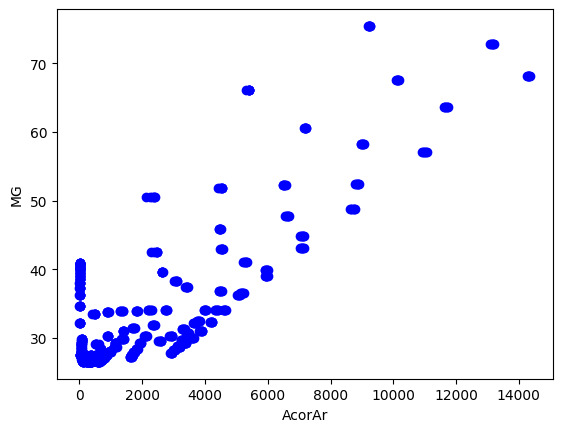

In [4]:
# plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")
# plt.show()

plt.scatter(cdf.AcorAr, cdf.MG,  color='blue')
plt.xlabel("AcorAr")
plt.ylabel("MG")
plt.show()

#### Creating train and test dataset



In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## **Ridge regression**


Ridge regression is a variation of linear regression that includes an additional regularization term, often referred to as "L2 regularization," to address the problem of multicollinearity and improve the stability of the coefficient estimates. The statement you provided mentions that the assumptions of ridge regression are the same as those of linear regression. Let's briefly explain the three main assumptions:

- **Linearity**
- **Constant Variance (Homoscedasticity)**
- **Independence**



**The cost function for ridge regression:**

Min(||Y – X(theta)||^2 + λ||theta||^2)

Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced.

### **Standardization**

In ridge regression, the first step is to standardize the variables (both dependent and independent) by subtracting their means and dividing by their standard deviations.

In [6]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [7]:
# train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
train[['tau','theta','MVI','Deli', 'AcorAr','MG']]

,tau,theta,MVI,Deli,AcorAr,MG
0,455,181,0.999982,0.999978,4329.209163,34.101803
1,155,181,0.999983,0.999979,14369.155960,68.099895
2,505,41,0.999849,0.999848,188.722445,26.957749
3,155,181,0.999989,0.999984,14285.013080,68.099895
5,155,81,0.999956,0.999955,2639.801359,39.668763
...,...,...,...,...,...,...
735,55,21,0.999778,0.999773,471.653984,33.443197
736,655,121,0.999964,0.999964,1640.447293,27.166505
739,455,121,0.999967,0.999967,1901.331112,29.230113
740,655,1,0.979414,0.979408,16.465280,40.960081


In [8]:
# train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]= std_scale.fit_transform(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']])
# test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]= std_scale.fit_transform(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']])
# train

train[['tau','theta','MVI','Deli', 'AcorAr','MG']]= std_scale.fit_transform(train[['tau','theta','MVI','Deli', 'AcorAr','MG']])
test[['tau','theta','MVI','Deli', 'AcorAr','MG']]= std_scale.fit_transform(test[['tau','theta','MVI','Deli', 'AcorAr','MG']])
train

C:\Users\keoni\AppData\Local\Temp\ipykernel_12956\2824896595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['tau','theta','MVI','Deli', 'AcorAr','MG']]= std_scale.fit_transform(train[['tau','theta','MVI','Deli', 'AcorAr','MG']])
C:\Users\keoni\AppData\Local\Temp\ipykernel_12956\2824896595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['tau','theta','MVI','Deli', 'AcorAr','MG']]= std_scale.fit_transform(test[['tau','theta','MVI','Deli', 'AcorAr','MG']])


,tau,theta,MVI,Deli,AcorAr,MG
0,0.481260,1.629671,0.358679,0.359096,0.596860,-0.076397
1,-1.148408,1.629671,0.358839,0.359266,3.844032,3.071739
2,0.752871,-0.791402,0.336761,0.337725,-0.742278,-0.737919
3,-1.148408,1.629671,0.359892,0.360136,3.816818,3.071739
5,-1.148408,-0.099667,0.354503,0.355290,0.050463,0.439089
...,...,...,...,...,...,...
735,-1.691630,-1.137270,0.325074,0.325332,-0.650770,-0.137383
736,1.567704,0.592068,0.355787,0.356738,-0.272753,-0.718588
739,0.481260,0.592068,0.356277,0.357284,-0.188377,-0.527503
740,1.567704,-1.483137,-3.034994,-3.032690,-0.797990,0.558662


In [9]:
# col= ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',	'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']
# X_train = np.asanyarray(train[col])
# y_train = np.asanyarray(train[['CO2EMISSIONS']])
# X_test= np.asanyarray(test[col])
# y_test = np.asanyarray(test[['CO2EMISSIONS']])

col= ['tau','theta','MVI','Deli', 'AcorAr']
X_train = np.asanyarray(train[col])
y_train = np.asanyarray(train[['MG']])   
X_test= np.asanyarray(test[col])
y_test = np.asanyarray(test[['MG']])

### **Linear Regression**: Baseline

In [10]:
from sklearn import linear_model
regression_model  = linear_model.LinearRegression()

regression_model .fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regression_model.coef_)

Coefficients:  [[ -0.03177894  -0.53283108  11.01305769 -11.15380175   1.23559422]]


In [11]:
for idx, col_name in enumerate(col):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for tau is -0.03177894191189309
The coefficient for theta is -0.5328310829758527
The coefficient for MVI is 11.013057689755536
The coefficient for Deli is -11.153801750563407
The coefficient for AcorAr is 1.2355942211309408


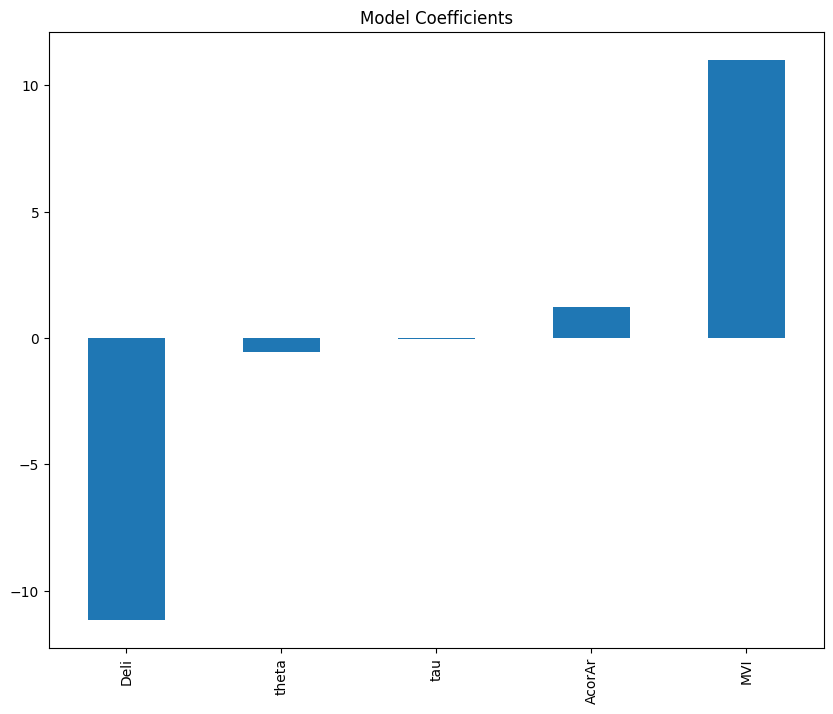

In [12]:
#checking the magnitude of coefficients
from pandas import Series, DataFrame
predictors = col
 
coef = Series(regression_model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

In [13]:
from sklearn.metrics import r2_score
y_hat= regression_model.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regression_model.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat ,y) )

Residual sum of squares: 0.11
Variance score: 0.89
R2-score: 0.88


### **Regularization**


- 1) Value of alpha, which is a hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually. We run a grid search for optimum alpha values
- 2) To find optimum alpha for Ridge Regularization we are applying GridSearchCV

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X=np.concatenate([X_test, X_train], axis=0)
y=np.concatenate([y_test, y_train], axis=0)

ridge=Ridge()
alpha= np.linspace(1e-100, 1, 1000)

parameters={'alpha':alpha}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

# The negative sign is because of the known error in the Grid Search Cross Validation library, so ignore the negative sign.
best_ridge_model = ridge_regressor.best_estimator_
for idx, col_name in enumerate(col):
    print("The coefficient for {} is {}".format(col_name, best_ridge_model.coef_[0][idx]))

{'alpha': 0.001001001001001001}
-0.09905330458783129
The coefficient for tau is -0.03303224392335881
The coefficient for theta is -0.5491247233738302
The coefficient for MVI is 8.512309622935287
The coefficient for Deli is -8.648943416363833
The coefficient for AcorAr is 1.2350599942173246


In [15]:
best_ridge_model = ridge_regressor.best_estimator_
y_hat = best_ridge_model.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % best_ridge_model.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat ,y) )

Residual sum of squares: 0.11
Variance score: 0.89
R2-score: 0.88


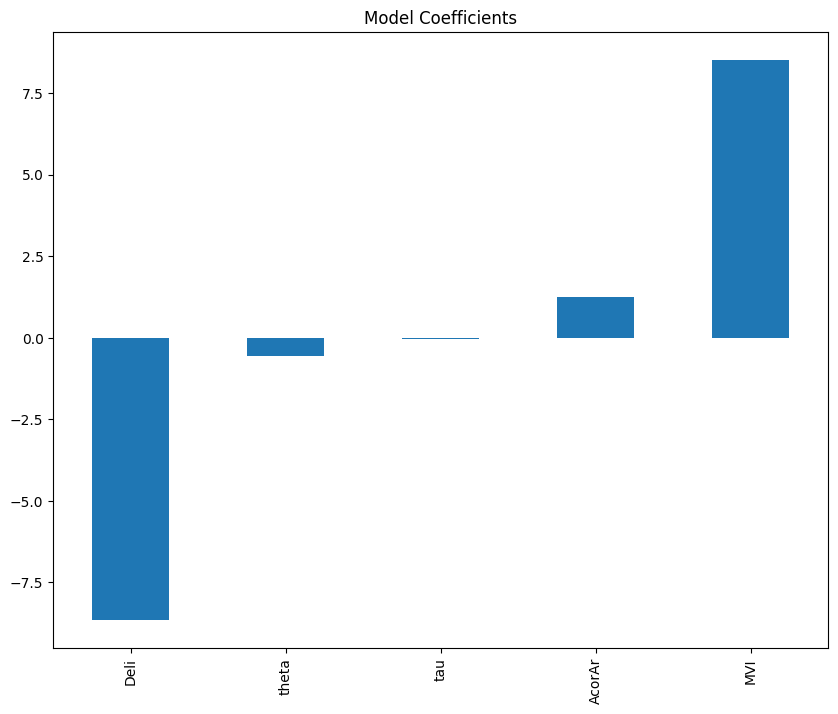

In [16]:
predictors = col
 
coef = Series(best_ridge_model.coef_.flatten(),predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

## **LASSO regression** 

LASSO stands for Least Absolute Shrinkage and Selection Operator.

The primary goal of LASSO regression is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero.This feature makes LASSO particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

Lasso Regression uses L1 regularization technique . It is used when we have more features because it automatically performs feature selection.

**Mathematical equation of Lasso Regression**


- Residual Sum of Squares + λ * (Sum of the absolute value of the magnitude of coefficients)

Where,

λ denotes the amount of shrinkage.
λ = 0 implies all features are considered and it is equivalent to the linear regression where only the residual sum of squares is considered to build a predictive model
λ = ∞ implies no feature is considered i.e, as λ closes to infinity it eliminates more and more features
The bias increases with increase in λ
variance increases with decrease in λ

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV



# Definir el modelo y los hiperparámetros a buscar
lasso = Lasso()
alpha= np.linspace(1e-100, 1, 1000)
parameters = {'alpha': alpha}

# Crear el objeto GridSearchCV
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Entrenar el modelo
lasso_regressor.fit(X_train, y_train)

# Ver los resultados del mejor modelo
print("Best Params:", lasso_regressor.best_params_)
print("Best Score (negative mean squared error):", lasso_regressor.best_score_)


# The negative sign is because of the known error in the Grid Search Cross Validation library, so ignore the negative sign.
best_lasso_model = lasso_regressor.best_estimator_
for idx, col_name in enumerate(col):
    print("The coefficient for {} is {}".format(col_name, best_lasso_model.coef_[idx]))


c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.106e+01, tolerance: 4.548e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+01, tolerance: 4.759e-02 Linear regression models with null weight for the l1 regularization term are more efficiently 

Best Params: {'alpha': 1e-100}
Best Score (negative mean squared error): -0.1009957946585895
The coefficient for tau is -0.027109015203293504
The coefficient for theta is -0.5558553490167982
The coefficient for MVI is 0.17118309193764963
The coefficient for Deli is -0.30353048797071425
The coefficient for AcorAr is 1.2464774234147482


c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+01, tolerance: 5.830e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [18]:
best_lasso_model = lasso_regressor.best_estimator_
y_hat = best_lasso_model.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % best_lasso_model.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat ,y) )

Residual sum of squares: 1.93
Variance score: 0.89
R2-score: 0.88


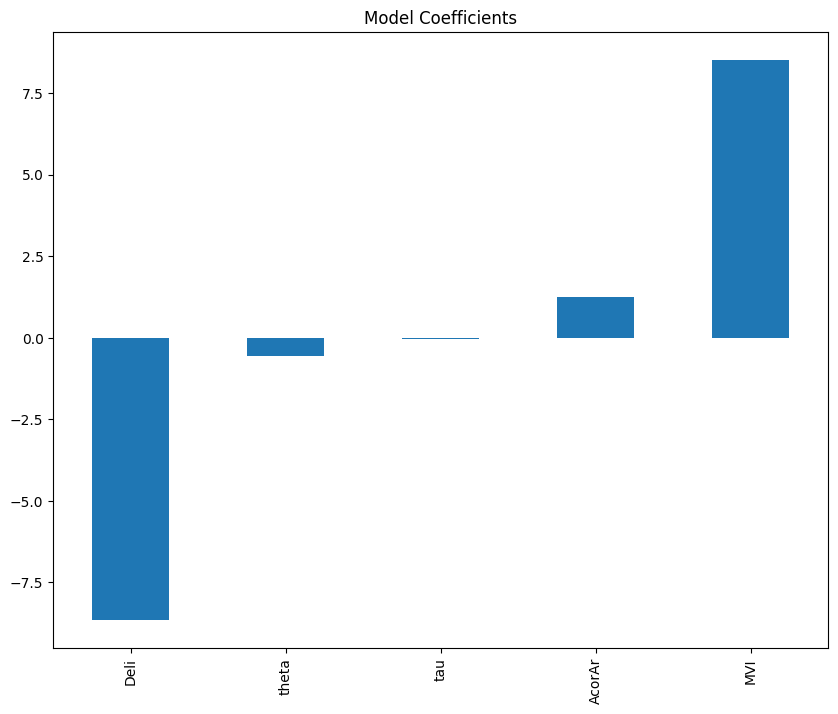

In [19]:
predictors = col
 
coef = Series(best_ridge_model.coef_.flatten(),predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

In [26]:
lasso = Lasso(alpha=0.1)
# Entrenar el modelo
lasso.fit(X_train, y_train)

y_hat = lasso.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % best_lasso_model.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat ,y) )

for idx, col_name in enumerate(col):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))



Residual sum of squares: 1.61
Variance score: 0.89
R2-score: 0.67
The coefficient for tau is -0.13977614558096108
The coefficient for theta is -0.12811300542447915
The coefficient for MVI is -0.0
The coefficient for Deli is -0.11853471665002532
The coefficient for AcorAr is 0.7987115071925277


### **Multi-task Lasso**

For multiple variables to predict

In [43]:
from sklearn.linear_model import MultiTaskLasso


# Definir el modelo y los hiperparámetros a buscar
model = MultiTaskLasso(alpha=1.0)
alpha= np.linspace(1e-100, 1, 1000)
parameters = {'alpha': alpha}

# Crear el objeto GridSearchCV
lasso_regressor = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

# Entrenar el modelo
lasso_regressor.fit(X_train, y_train)

# Ver los resultados del mejor modelo
print("Best Params:", lasso_regressor.best_params_)
print("Best Score (negative mean squared error):", lasso_regressor.best_score_)


# The negative sign is because of the known error in the Grid Search Cross Validation library, so ignore the negative sign.
best_lasso_model = lasso_regressor.best_estimator_
for idx, col_name in enumerate(col):
    print("The coefficient for {} is {}".format(col_name, best_lasso_model.coef_[0][idx]))


best_lasso_model = lasso_regressor.best_estimator_
y_hat = best_lasso_model.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % best_lasso_model.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat ,y) )


c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.2491952320366, tolerance: 0.04655582502452584
  ) = cd_fast.enet_coordinate_descent_multi_task(
c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.60626652674407, tolerance: 0.05013737542635531
  ) = cd_fast.enet_coordinate_descent_multi_task(
c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.152744506622085, tolerance: 0.04868760464561696
  ) = cd_fast.enet_coordinate_descent_m

Best Params: {'alpha': 1e-100}
Best Score (negative mean squared error): -0.10666622765979668
The coefficient for tau is -0.02800389512350075
The coefficient for theta is -0.5710322956615449
The coefficient for MVI is 0.16848972443891513
The coefficient for Deli is -0.27959846765793567
The coefficient for AcorAr is 1.2412264790735377
Residual sum of squares: 0.10
Variance score: 0.90
R2-score: 0.88


c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.341345304004605, tolerance: 0.059899999999999995
  ) = cd_fast.enet_coordinate_descent_multi_task(


### **Elastic net**

The elastic net algorithm uses a weighted combination of L1 and L2 regularization. As you can probably see, the same function is used for LASSO and Ridge regression with only the L1_wt argument changing. This argument determines how much weight goes to the L1-norm of the partial slopes. If the regularization is pure L2 (Ridge) and if L1_wt = 1.0 the regularization is pure L1 (LASSO).

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Supongamos que tienes tus datos de entrenamiento X_train y y_train, y tus datos de prueba X_test y y_test.


alpha= np.linspace(1e-100, 1, 100)
l1_ratio= np.linspace(1e-100, 1, 100)



# Definir el modelo y los hiperparámetros a buscar
elastic_net = ElasticNet()
parameters = {
    'alpha': alpha,
    'l1_ratio': l1_ratio
}

# Crear el objeto GridSearchCV
elastic_net_regressor = GridSearchCV(elastic_net, parameters, scoring='neg_mean_squared_error', cv=5)

# Entrenar el modelo
elastic_net_regressor.fit(X_train, y_train)

# Ver los resultados del mejor modelo
print("Best Params:", elastic_net_regressor.best_params_)
print("Best Score (negative mean squared error):", elastic_net_regressor.best_score_)

# Hacer predicciones con el mejor modelo
best_elastic_net_model = elastic_net_regressor.best_estimator_
predictions = best_elastic_net_model.predict(X_test)

y_hat = best_elastic_net_model.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % best_elastic_net_model.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat ,y) )

c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.106e+01, tolerance: 4.548e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+01, tolerance: 4.759e-02 Linear regression models with null weight for the l1 regularization term are more efficiently 

Best Params: {'alpha': 1e-100, 'l1_ratio': 1e-100}
Best Score (negative mean squared error): -0.1009957946585895
Residual sum of squares: 1.93
Variance score: 0.89
R2-score: 0.88


c:\Users\keoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+01, tolerance: 5.830e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
